In [1]:
%pylab inline
import numpy as npp
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


# Normal Distribution

1. mean값을 중심으로 symmetric shape을 갖고 있다. 
2. mean, median, 그리고 mode값 모두 동일하다 
3. curve아래의 모든 값을 합하면 1이다. 
4. 특정 $ x_i $의 값은 0이다.
5. 평균값이 높으면 우측으로 그래프가 이동(shift)하고, 평균값이 낮으면 왼쪽으로 이동(shift)한다.
6. Standard deviation값이 높을수록 그래프는 넓게 퍼져있고, 작을수록 커브의 모양이 좁아진다.

## Z-Score 

특정 $ x_i $ 의 값이 평균에서 standard deviation기준으로 몇단계나 떨어져 있는지 나타냄

$$ z_x = \frac{x - \mu}{\sigma} $$



## Probability Density Function For Normal Distribution


$$ f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2}} $$

In [2]:
def normal_pdf(x, var, mean):
    """
    Probability Density Function for Normal Distribution
    """
    return 1/np.sqrt(2 * np.pi * var) * np.exp( -(x - mean)**2/(2*var))

norm = stats.norm(61, scale=4)
normal_pdf(65, var=norm.var(), mean=norm.mean()), norm.pdf(65)

(0.060492681129785841, 0.060492681129785841)

## Normal Distribution in Scipy

scipy.stats.norm 을 사용하면 됩니다.

| Function | Arguments | Description |
|:---------|:----------|:------------|
| pdf      | (x, loc=0, scale=1) | Probability Density Function <br>특정값의 확률을 리턴 |
| ppf      | (q, loc=0, scale=1) | Percent Point Function <br> 확률을 입력하면 x값을 알아낼수 있음 |
| cdf      | (x, loc=0, scale=1) | cumulative distribution function <br>해당 Distribution의 처음부터 x값까지의 면적값.. 즉 전체 확률 값 |

## 문제 A

자동차 Checkpoint 지점에서 자동차의 속도는 normal distributed 되어있으며, 평균속도는 시간당 $ \mu = 61 $ miles 이고 표준편차 $ \sigma = 4 $ 이다. <br>

#### **문제1**. 이때 시간당 65 miles이하로 체크포인트를 지나가는 자동차들의 확률은? (답. 0.8413 )

<span style="color:#777777">
cdf(x, loc=0, scale=1) (Cumulative distribution function)을 이용하면 답을 구할수 있다.
</span>

In [3]:
norm = stats.norm(61, scale=4)
norm.cdf(65)

0.84134474606854293

위의 답을 그래프로 그리면 다음과 같습니다.

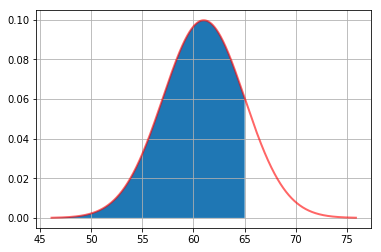

In [4]:
def fill_dist(dist: stats.norm, start=None, end=None):
    if start is None:
        start = dist.ppf(0.0001)
    if end is None:
        end = dist.ppf(0.9999)
    
    # Plot Distribution
    x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 10000)
    plot(x, dist.pdf(x), 'r-', lw=2, alpha=0.6, label='norm pdf')
    
    # Fill Part of the Distribution
    x2 = np.linspace(start, end, 10000)
    y2 = norm.pdf(x2)
    y2[0] = 0
    y2[-1] = 0
    fill(x2, y2)
    grid()
    
norm = stats.norm(61, scale=4)
fill_dist(norm, end=65)

#### 문제 4. 시간당 66 miles 속도 이상으로 체크포인트를 지나가는 자동차들의 확률은? (답. 0.1056)

0.105649773667


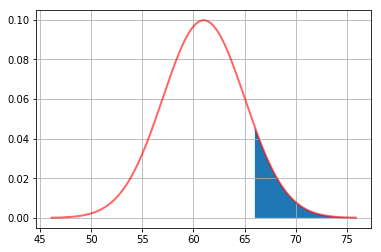

In [5]:
print(1 - norm.cdf(66))

norm = stats.norm(61, scale=4)
fill_dist(norm, start=66, end=norm.ppf(0.9999))

0.30853753872598688

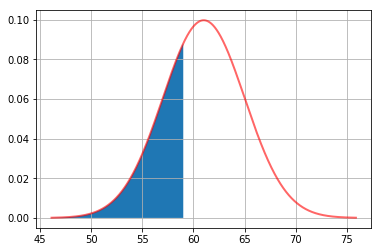

In [6]:
fill_dist(norm, end=59)
norm.cdf(59)

#### **문제3**. 시간당 65 miles속도의  z-score를 구하라 (답. 1)


In [7]:
def zscore(dist, value):
    return (value - norm.mean())/norm.std()
zscore(norm, 65)

1.0

# 

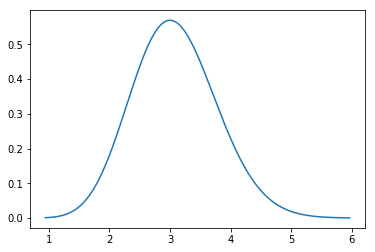

In [26]:
chi = stats.chi(10)

x = np.linspace(chi.ppf(0.0001), chi.ppf(0.9999), 10000)
plot(x, chi.pdf(x))